In [1]:
import pandas as pd


In [2]:
df = pd.read_csv('../data_export/eda_books.csv')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1996 entries, 0 to 1995
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   id                         1996 non-null   int64         
 1   name                       1996 non-null   object        
 2   price                      1996 non-null   int64         
 3   original_price             1996 non-null   int64         
 4   rating_average             1996 non-null   float64       
 5   review_count               1996 non-null   int64         
 6   author                     1996 non-null   object        
 7   quantity_sold              1996 non-null   int64         
 8   inventory_status           1996 non-null   object        
 9   category_id                1996 non-null   int64         
 10  category_name              1996 non-null   object        
 11  Công ty phát hành          1996 non-null   object        
 12  Loại b

In [4]:
df['Ngày xuất bản'] = pd.to_datetime(df['Ngày xuất bản'], errors='coerce')

C:\Users\CEO\AppData\Local\Temp\ipykernel_3020\1578937461.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Ngày xuất bản'] = pd.to_datetime(df['Ngày xuất bản'], errors='coerce')


In [6]:
df['Năm xuất bản điền bổ sung'] = df['Năm xuất bản']

In [7]:
df.loc[df['Năm xuất bản'].isna(), 'Năm xuất bản điền bổ sung'] = df['Ngày xuất bản'].dt.year

In [9]:
df['Năm xuất bản điền bổ sung'] = df['Năm xuất bản điền bổ sung'].astype('Int64')

In [13]:
df_corr = df.dropna(subset=['price', 'Năm xuất bản điền bổ sung'])

In [33]:
df_corr = df_corr.drop(columns=['Ngày xuất bản', 'Năm xuất bản'])

In [34]:
df_corr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1466 entries, 0 to 1995
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         1466 non-null   int64  
 1   name                       1466 non-null   object 
 2   price                      1466 non-null   int64  
 3   original_price             1466 non-null   int64  
 4   rating_average             1466 non-null   float64
 5   review_count               1466 non-null   int64  
 6   author                     1466 non-null   object 
 7   quantity_sold              1466 non-null   int64  
 8   inventory_status           1466 non-null   object 
 9   category_id                1466 non-null   int64  
 10  category_name              1466 non-null   object 
 11  Công ty phát hành          1466 non-null   object 
 12  Loại bìa                   1406 non-null   object 
 13  Số trang                   1466 non-null   int64  
 1

In [ ]:
check_corr = df_corr[['original_price', 'Năm xuất bản điền bổ sung']].corr()
check_corr

,original_price,Năm xuất bản điền bổ sung
original_price,1.00000,0.07451
Năm xuất bản điền bổ sung,0.07451,1.00000


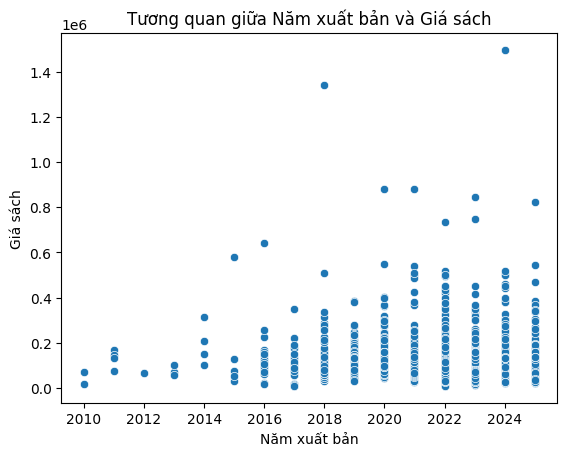

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df_corr, x='Năm xuất bản điền bổ sung', y='price')
plt.title('Tương quan giữa Năm xuất bản và Giá sách')
plt.xlabel('Năm xuất bản')
plt.ylabel('Giá sách')
plt.show()


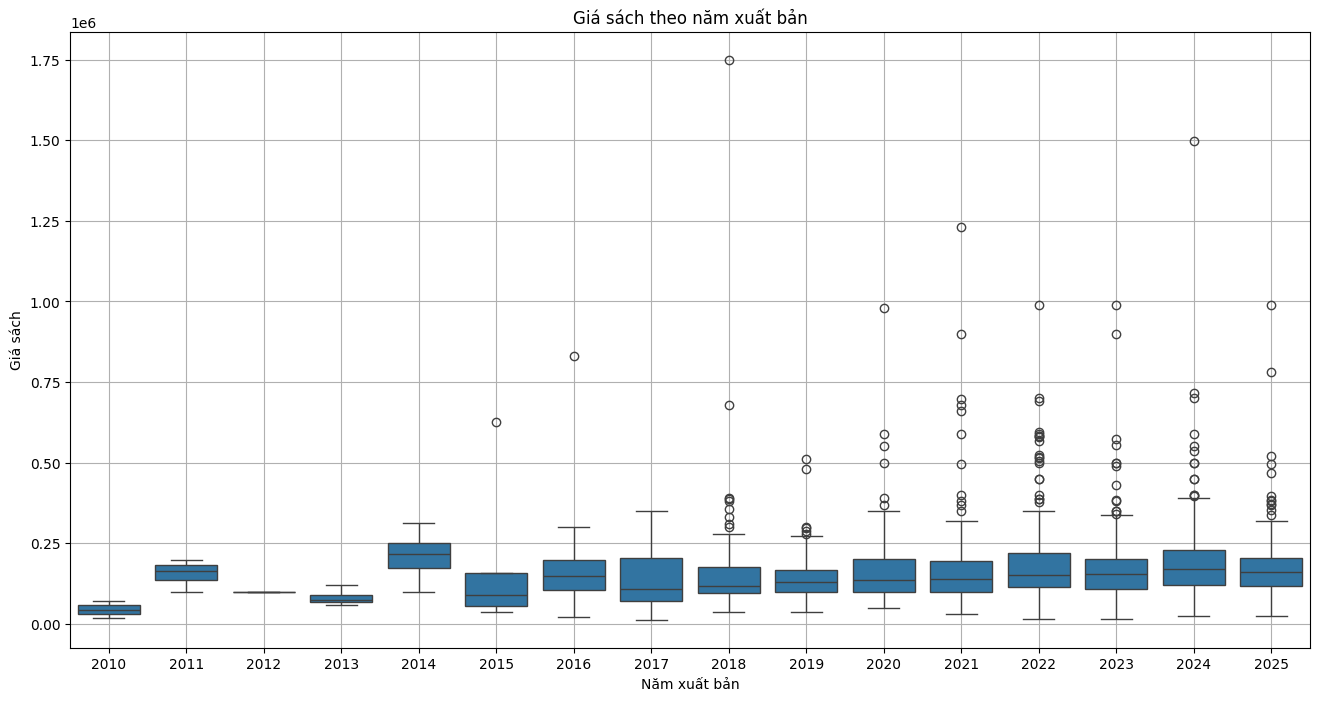

In [32]:
plt.figure(figsize=(16, 8))
sns.boxplot(data=df_corr, x='Năm xuất bản điền bổ sung', y='original_price')
plt.title('Giá sách theo năm xuất bản')
plt.ylabel('Giá sách')
plt.xlabel('Năm xuất bản')
plt.grid()
plt.show()

In [36]:
check_corr_page = df_corr[['Số trang', 'Năm xuất bản điền bổ sung']].corr()
check_corr_page

,Số trang,Năm xuất bản điền bổ sung
Số trang,1.000000,-0.011397
Năm xuất bản điền bổ sung,-0.011397,1.000000


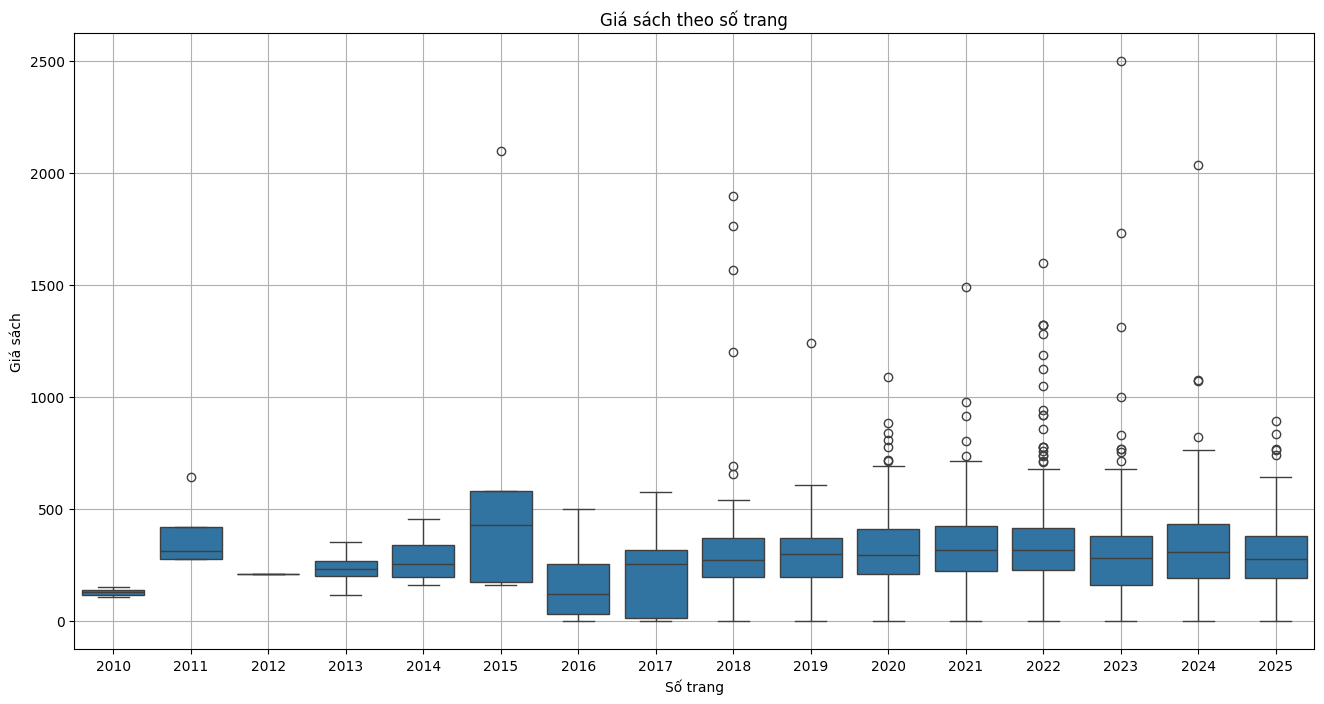

In [37]:
plt.figure(figsize=(16, 8))
sns.boxplot(data=df_corr, x='Năm xuất bản điền bổ sung', y='Số trang')
plt.title('Giá sách theo số trang')
plt.ylabel('Giá sách')
plt.xlabel('Số trang')
plt.grid()
plt.show()